In [24]:
# COVID data exploration - predict future spread

#Idea 1
#input population, country location (long and latitude? for temp)

#Idea 2
#Make it country specific, meaning you input USA and it spits out the projected growth


#general questions
#How do you solve this problem without creating a model for each country?


import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from google.cloud import storage
from io import BytesIO

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

print(tf.__version__)

2.1.0


In [25]:


data = pd.read_csv("gs://ml-dev-2022/covid-confirmed.csv")

#note that you need to use the inplace keyword when you dont want to create a copy of the data set
data.drop(data.columns[[2,3,4]],axis=1,inplace=True)


data.head()

y=data._3_31_20
# print(y)
x=data.drop('_3_31_20', axis=1)



train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

#head shows the top 5 of the dataset

#describe shows stats, only numerical values
train_dataset.describe()

,_1_22_20,_1_23_20,_1_24_20,_1_25_20,_1_26_20,_1_27_20,_1_28_20,_1_29_20,_1_30_20,_1_31_20,...,_3_22_20,_3_23_20,_3_24_20,_3_25_20,_3_26_20,_3_27_20,_3_28_20,_3_29_20,_3_30_20,_3_31_20
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2.570732,2.897561,4.092683,6.160976,9.019512,12.419512,24.697561,27.043902,36.365854,43.463415,...,1534.624390,1729.570732,1915.873171,2147.882927,2439.990244,2739.146341,3053.063415,3330.990244,3624.219512,3975.765854
std,31.057207,31.138751,38.704590,53.840709,75.153957,101.245574,249.316096,250.649026,345.502983,409.495774,...,7360.182224,8048.267779,8744.237528,9674.603495,10934.030808,12248.277700,13695.104132,15050.611830,16531.962924,18358.164607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,5.000000,6.000000,7.000000,10.000000,11.000000,11.000000,13.000000,15.000000,16.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70.000000,75.000000,81.000000,91.000000,96.000000,107.000000,120.000000,136.000000,148.000000,152.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,317.000000,355.000000,392.000000,442.000000,493.000000,562.000000,625.000000,656.000000,693.000000,743.000000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,67800.000000,67800.000000,69176.000000,74386.000000,83836.000000,101657.000000,121478.000000,140886.000000,161807.000000,188172.000000


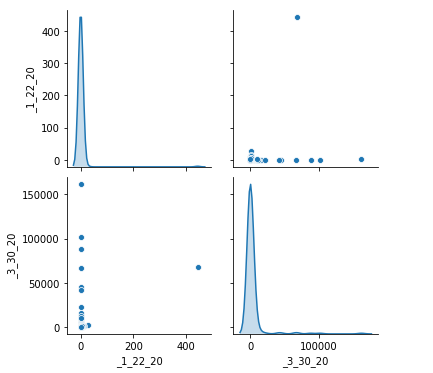

In [26]:
sns.pairplot(data[["_1_22_20","_3_30_20"]], diag_kind="kde")

In [27]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [28]:
model = build_model()

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                4672      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [23]:
EPOCHS = 1000

history = model.fit(
  x, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).